# This notebook goes through using OSMNX to extract OSM data

In [1]:
import geopandas as gpd
import json
import networkx as nx
import pandas as pd
import osmnx as ox

In [2]:
from methods import point_df_to_geojson
from methods import link_df_to_geojson

# Read polygon boundry for Bay Area, and run OSM extraction for links and nodes

In [3]:
# polygon boundary
county_polys_gdf = gpd.read_file("../../data/external/county_boundaries/county_5m - Copy.shp")
county_polys_gdf.crs

# project to lat-long
county_polys_gdf = county_polys_gdf.to_crs(epsg = 4326)

boundary = county_polys_gdf.geometry.unary_union
#boundary = county_polys_gdf.iloc[3].geometry

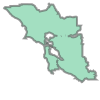

In [4]:
boundary

In [5]:
# OSM extraction

G_drive = ox.graph_from_polygon(boundary, network_type='all', simplify=False)

link_gdf = ox.graph_to_gdfs(G_drive, nodes = False, edges = True)
node_gdf = ox.graph_to_gdfs(G_drive, nodes = True, edges = False)

In [6]:
link_gdf.columns

Index(['osmid', 'oneway', 'lanes', 'ref', 'name', 'highway', 'maxspeed',
       'length', 'bridge', 'service', 'width', 'access', 'junction', 'tunnel',
       'est_width', 'area', 'landuse', 'geometry', 'u', 'v', 'key'],
      dtype='object')

# writing out OSM link data to geojson

In [7]:
link_prop = link_gdf.drop("geometry", axis = 1).columns.tolist()
link_geojson = link_df_to_geojson(link_gdf, link_prop)

In [8]:
with open("../../data/external/osmnx_extract/link.geojson", "w") as f:
    json.dump(link_geojson, f)

# writing out OSM node data to geojson

In [9]:
node_prop = node_gdf.drop("geometry", axis = 1).columns.tolist()
node_geojson = point_df_to_geojson(node_gdf, node_prop)

In [10]:
with open("../../data/external/osmnx_extract/node.geojson", "w") as f:
    json.dump(node_geojson, f)

# other tests

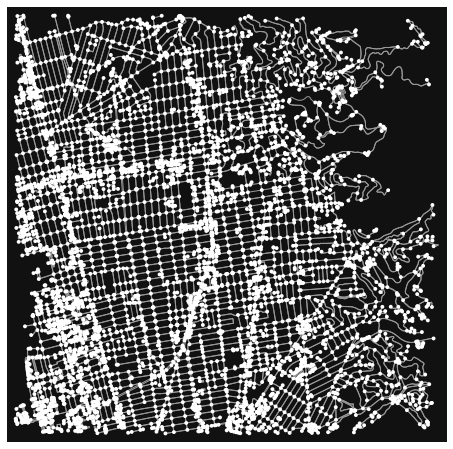

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [11]:
# extract for berkeley
G_Ber = ox.graph_from_point((37.863360, -122.265067), dist = 3000, network_type="bike")
ox.plot_graph(G_Ber)

In [12]:
link_gdf = ox.graph_to_gdfs(G_Ber, nodes = False, edges = True)
node_gdf = ox.graph_to_gdfs(G_Ber, nodes = True, edges = False)

link_prop = link_gdf.drop("geometry", axis = 1).columns.tolist()
link_geojson = link_df_to_geojson(link_gdf, link_prop)

with open("../../data/external/osmnx_extract/link_bike_berkeley.geojson", "w") as f:
    json.dump(link_geojson, f)

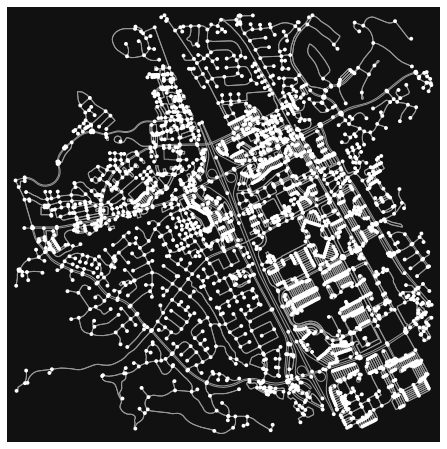

In [13]:
# extract for San Ramon
G_sanramon = ox.graph_from_point((37.773, -121.975), dist = 2000, network_type="all")
ox.plot_graph(G_sanramon)

link_gdf = ox.graph_to_gdfs(G_sanramon, nodes = False, edges = True)
node_gdf = ox.graph_to_gdfs(G_sanramon, nodes = True, edges = False)

link_prop = link_gdf.drop("geometry", axis = 1).columns.tolist()
link_geojson = link_df_to_geojson(link_gdf, link_prop)

with open("../../data/external/osmnx_extract/link_all_SanRamon.geojson", "w") as f:
    json.dump(link_geojson, f)

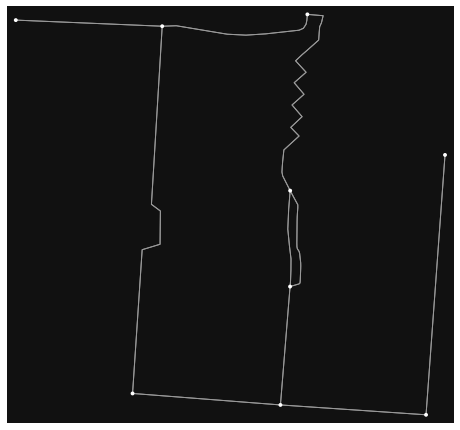

In [14]:
# the jagged line is a stair path in SF (https://goo.gl/maps/pKpgTLoTMG6qNVgg8)
G_SFstair = ox.graph_from_point((37.7376519, -122.40976230000001), dist = 100, network_type="all")
ox.plot_graph(G_SFstair)

link_gdf = ox.graph_to_gdfs(G_SFstair, nodes = False, edges = True)

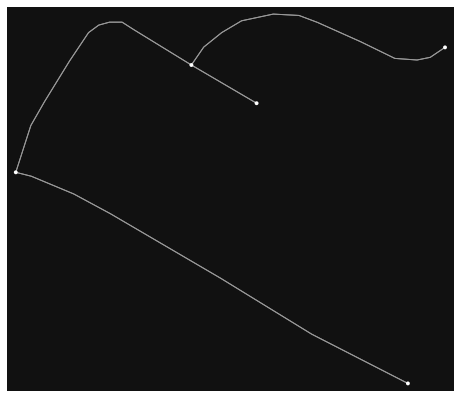

In [15]:
# Milpitas
G_milpitas = ox.graph_from_point((37.4485547, -121.8785988), dist = 300, network_type="all")
ox.plot_graph(G_milpitas)

link_gdf = ox.graph_to_gdfs(G_milpitas, nodes = False, edges = True)
node_gdf = ox.graph_to_gdfs(G_milpitas, nodes = True, edges = False)

In [16]:
link_gdf

,osmid,name,highway,oneway,length,geometry,u,v,key
0,261041761,Evans Road,tertiary,False,166.651,"LINESTRING (-121.88011 37.44590, -121.88052 37...",65447221,5913821434,0
1,261041761,Evans Road,tertiary,False,166.651,"LINESTRING (-121.88177 37.44661, -121.88171 37...",5913821434,65447221,0
2,626416859,NaN,service,False,103.219,"LINESTRING (-121.88177 37.44661, -121.88171 37...",5913821434,5913821444,0
3,626416859,NaN,service,False,28.219,"LINESTRING (-121.88075 37.44684, -121.88103 37...",5913821443,5913821444,0
4,626416859,NaN,service,False,28.219,"LINESTRING (-121.88103 37.44697, -121.88075 37...",5913821444,5913821443,0
5,626416859,NaN,service,False,103.219,"LINESTRING (-121.88103 37.44697, -121.88127 37...",5913821444,5913821434,0
6,626416860,NaN,service,False,106.323,"LINESTRING (-121.88103 37.44697, -121.88098 37...",5913821444,5913821456,0
7,626416860,NaN,service,False,106.323,"LINESTRING (-121.87996 37.44703, -121.87997 37...",5913821456,5913821444,0


In [17]:
node_gdf

,y,x,osmid,geometry
65447221,37.445900,-121.880113,65447221,POINT (-121.88011 37.44590)
5913821434,37.446609,-121.881772,5913821434,POINT (-121.88177 37.44661)
5913821443,37.446841,-121.880753,5913821443,POINT (-121.88075 37.44684)
5913821444,37.446969,-121.881029,5913821444,POINT (-121.88103 37.44697)
5913821456,37.447029,-121.879956,5913821456,POINT (-121.87996 37.44703)
